This notebook is used for explaining the steps involved in creating a Random Forest model 


1. Import the required libraries
2. Download the required dataset
3. Read the Dataset 
4. Observe the DataSet
5. Build a DBSCAN model
6. Training the DBSCAN model
7. Plotting the datapoints as labelled by the DBSCAN model

## Import the required libraries

In [ ]:
import pandas as pd                                                                            
import numpy as np                                                       
import matplotlib.pyplot as plt    
import zipfile                                            
from sklearn.model_selection import train_test_split         
from sklearn.ensemble import RandomForestClassifier       
from sklearn.metrics import accuracy_score                   
from sklearn.tree import plot_tree                            

## Download the required dataset

In [ ]:
!gdown --id 16CjsIX4WRP4h5IwXCaHeoJfpgbdT8_yE          #Importing the data set  

Downloading...
From: https://drive.google.com/uc?id=16CjsIX4WRP4h5IwXCaHeoJfpgbdT8_yE
To: /content/iris.zip
100% 1.01k/1.01k [00:00<00:00, 1.15MB/s]


## Read the Dataset 

In [ ]:
with zipfile.ZipFile("/content/iris.zip","r") as zip_ref:         #Extracting the data
    zip_ref.extractall("/content")                                              

In [ ]:
data = pd.read_csv('/content/iris.csv')                # Store dataset in dataframe
X = data.iloc[:,:-1]                                                             
y = data.iloc[:,-1]                                                             

## Observe the DataSet

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [ ]:
y.shape

(150,)

In [ ]:
for i in range(len(y)):
  if(y[i]=="Iris-setosa"):
    y[i]=0
  elif(y[i]=="Iris-versicolor"):
    y[i]=1
  else:
    y[i]=2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
y=list(y)
y=np.array(y)
X=np.array(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 33, test_size = 0.20)

##  Build a DBSCAN model

In [ ]:
model = RandomForestClassifier(random_state=21, max_depth=6, n_estimators=100)

## Training the DBSCAN model

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=21)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0,
       2, 0, 1, 2, 1, 1, 2, 2])

In [ ]:
accuracy_score(y_test, y_pred)

0.9

## Plotting the datapoints as labelled by the DBSCAN model

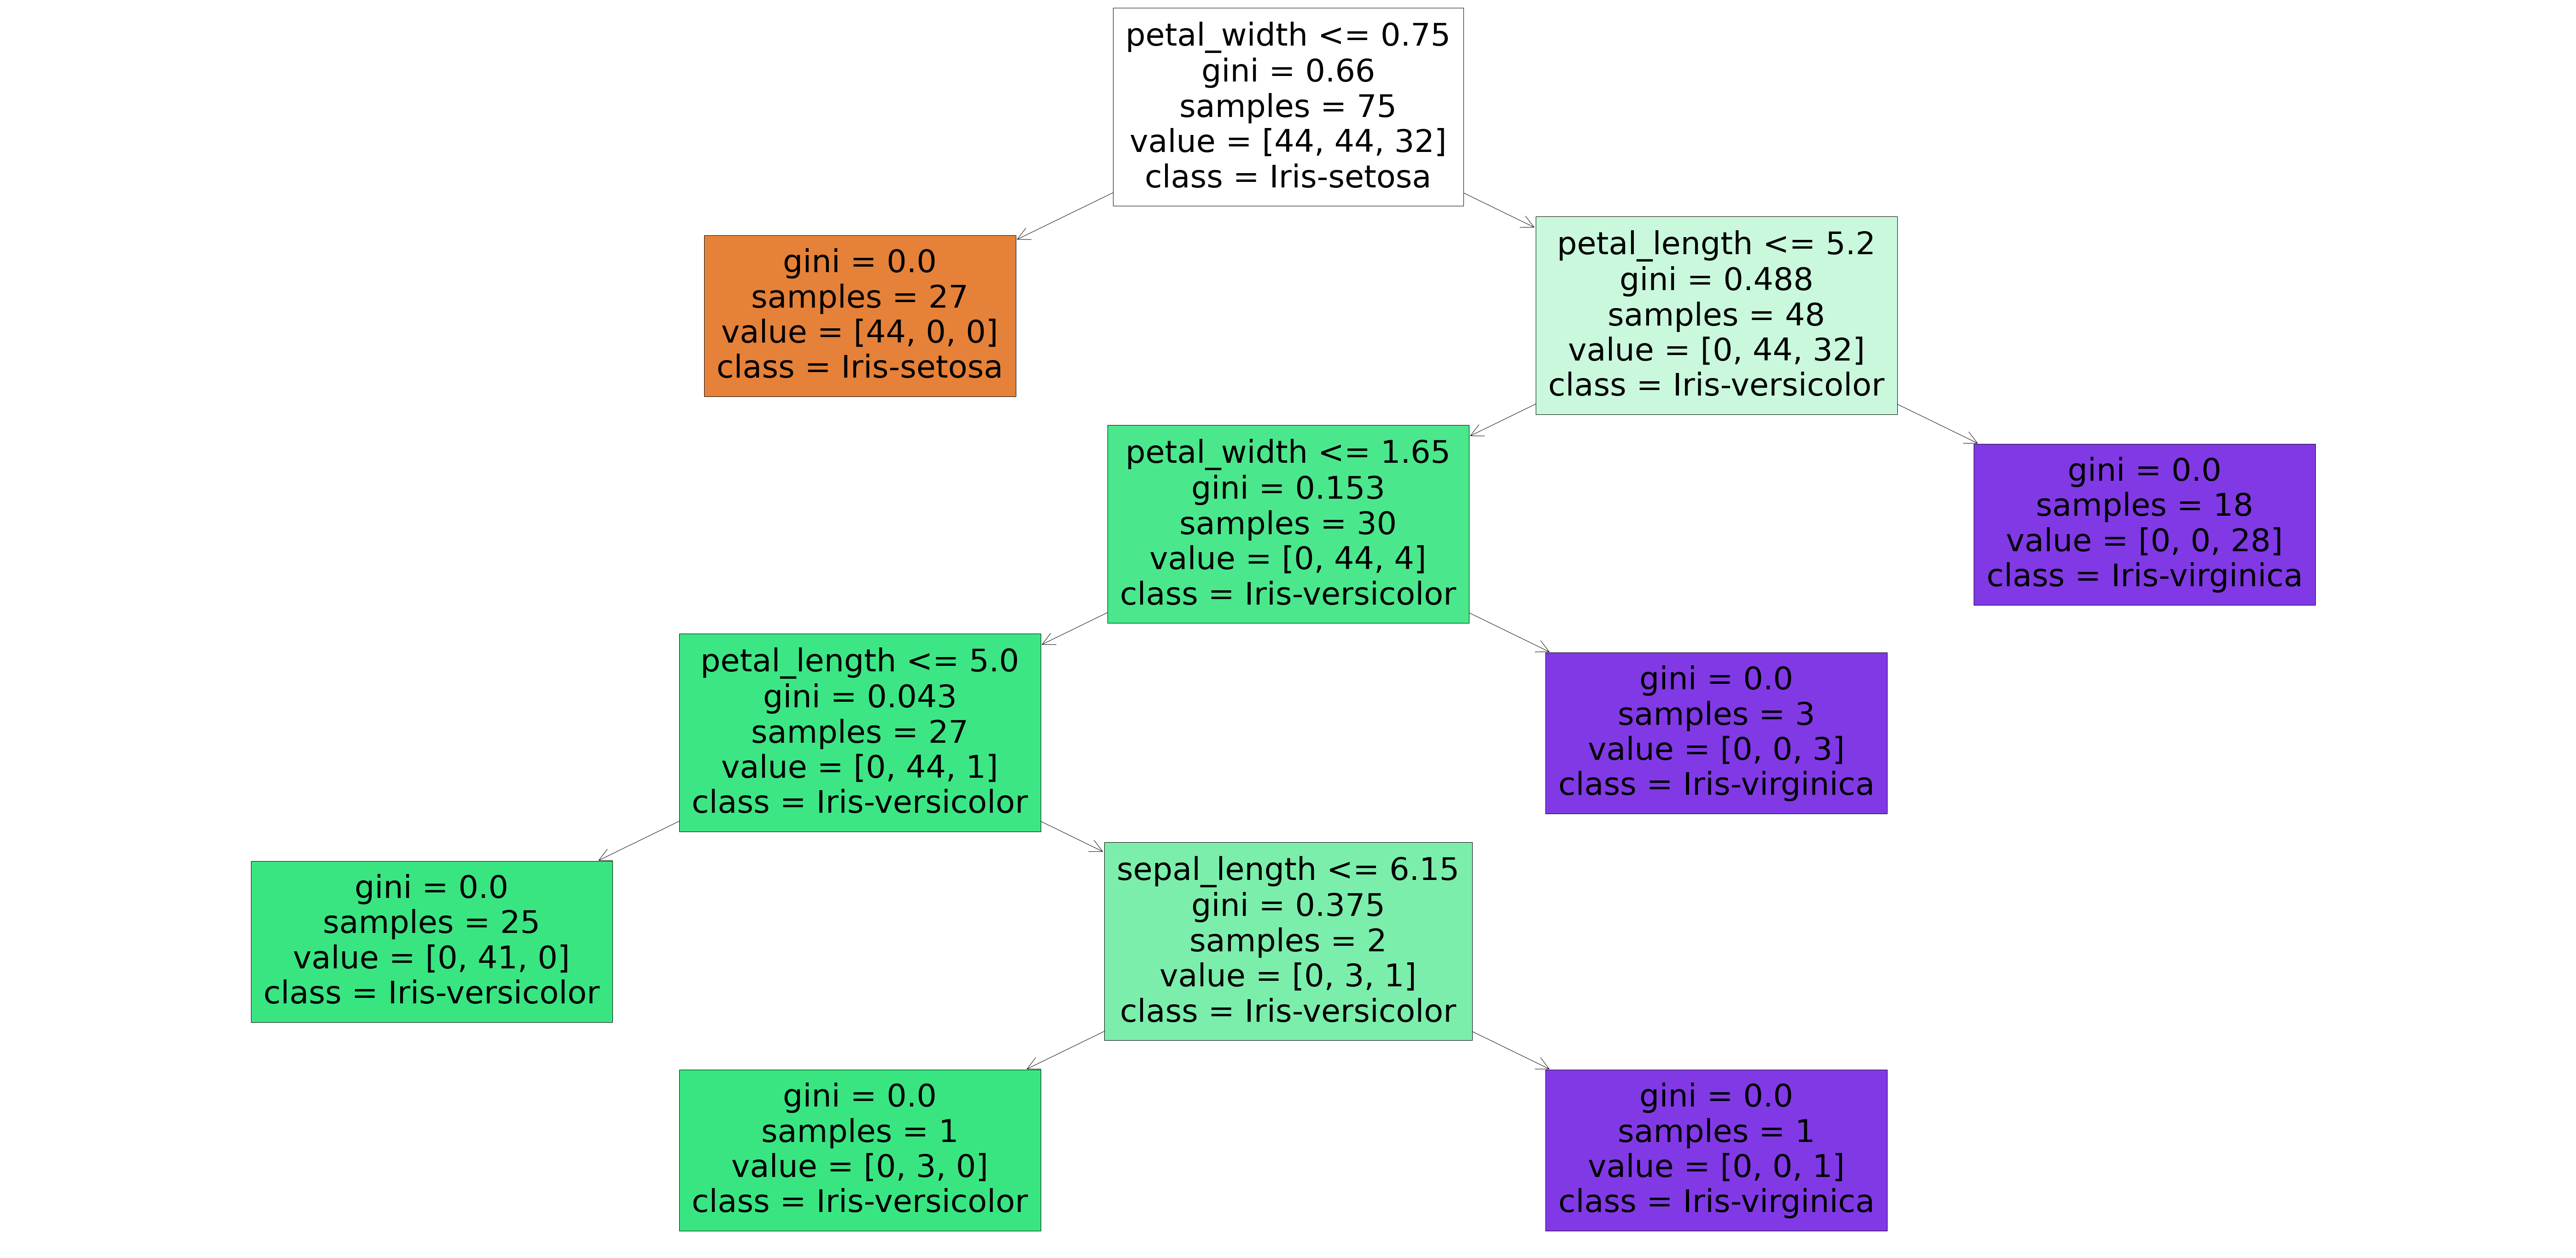

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100,50))
plot_tree(model.estimators_[2],feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
                               class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],filled=True);